# **SVM | RF | KNN – Breast Cancer Wisconsin Diagnostic Dataset**



## Breast Cancer Wisconsin (Diagnostic) Dataset



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Loading data from CSV

In [ ]:
# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
dataframe = pd.read_csv(url, names=names)

In [ ]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Pre-Processing

In [ ]:
# Handle missing values
dataframe.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Dataset is clean. There is no missing values therefore, no further processing required to remove or imputate missing data

In [ ]:
#for column  in dataframe.iloc[:, 1:].columns:
  #print(dataframe[column].unique())

In [ ]:
# Handle data types
dataframe.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Convert Boolean columns (e.g.: Yes/No) from Object type to Boolean

dataframe['diagnosis'] = dataframe['diagnosis'].map({'M':1, 'B':0})
dataframe = dataframe.drop('id', axis=1)
dataframe.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataframe.drop('diagnosis', axis=1))
#dataframe = scaler.fit_transform(dataframe)

### Split Train and Test set


In [ ]:
# Split the data into features and target
X = df_scaled
y = dataframe['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Applying Support Vector Machine (SVM)

First step is to determine best Kernel fuction for given dataset

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        67
           M       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

           B       0.86      1.00      0.92        67
           M       1.00      0.77      0.87        47

    accuracy                           0.90       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.90      0.90       114

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        67
           M       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              preci

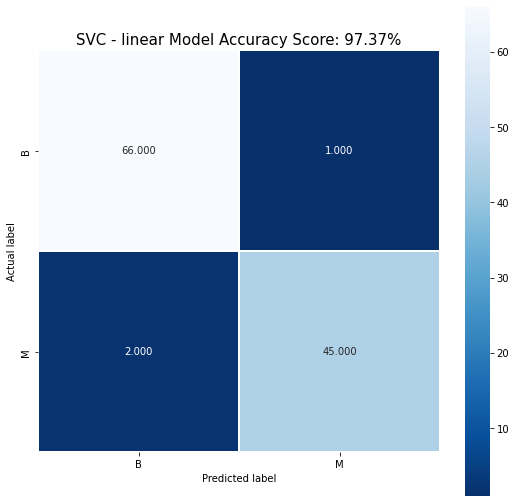

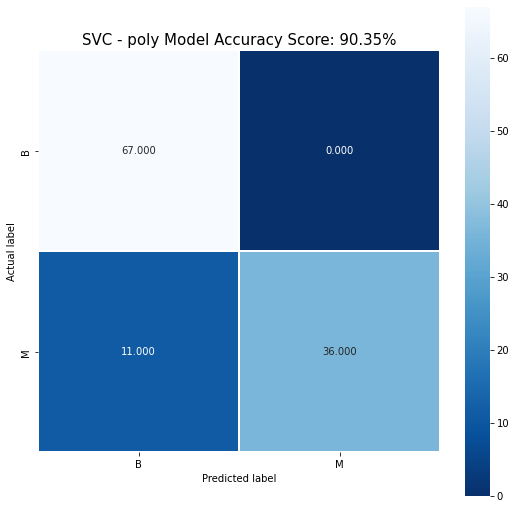

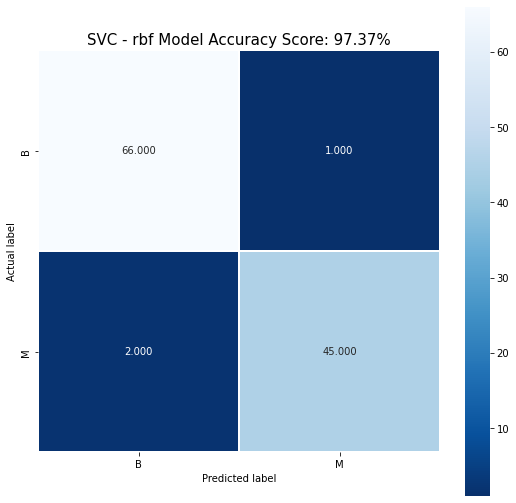

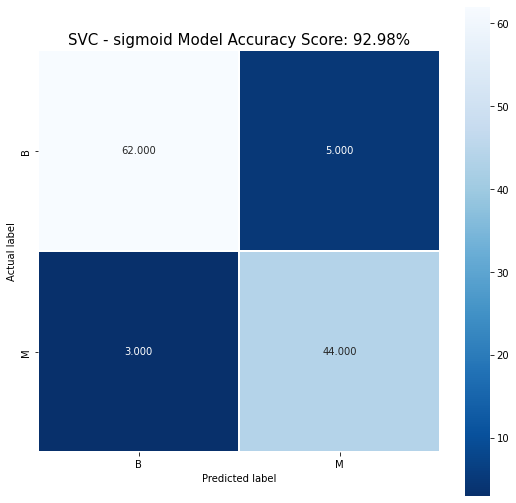

In [ ]:
# List of kernel functions to try
kernels = ["linear", "poly", "rbf", "sigmoid"]
class_names = ['B','M']

# Dictionary to store the performance of each SVM classifier
performance = {}

for kernel in kernels:
    # Train an SVM classifier using the current kernel function
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Predict the target values for the testing data
    y_pred = clf.predict(X_test)

    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = f'SVC - {kernel} Model Accuracy Score: {accuracy:.2%}'
    plt.title(all_sample_title, size = 15)

    print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

    # Store the performance metrics for the current SVM classifier
    performance[kernel] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Find the kernel with the best performance
best_kernel = max(performance, key=lambda x: performance[x]["f1"])

# Print the best kernel and its performance metrics
print("Best kernel: {}".format(best_kernel))
print("Accuracy: {:.2f}".format(performance[best_kernel]["accuracy"]))
print("Precision: {:.2f}".format(performance[best_kernel]["precision"]))
print("Recall: {:.2f}".format(performance[best_kernel]["recall"]))
print("F1-score:{:.2f}".format(performance[best_kernel]["f1"]))





              precision    recall  f1-score   support

           B       0.97      0.99      0.98        67
           M       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 97.37%
Precision: 97.83%
Recall: 95.74%
F1-score:96.77%


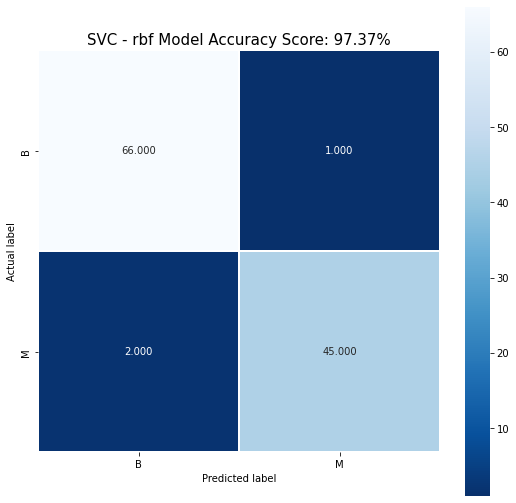

In [ ]:
# Re-run the model with new feature set

clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = clf.predict(X_test)

# Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'SVC - rbf Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))


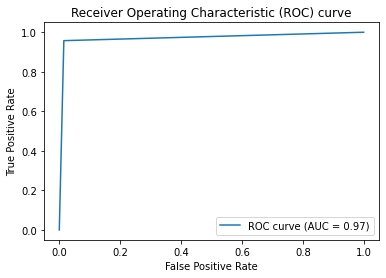

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()

## K-Nearest Neighbor (KNN) Implementation

we define a range of hyperparameters to search over, including the number of neighbors (n_neighbors), the weighting scheme (weights), and the value of p for the Minkowski distance metric (p). We use GridSearchCV to search over this range of hyperparameters and find the best hyperparameters that give the highest accuracy on the validation set.

Mean test score: 96.92% for hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Mean test score: 96.92% for hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean test score: 96.04% for hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Mean test score: 96.04% for hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Mean test score: 95.82% for hyperparameters: {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
Mean test score: 95.82% for hyperparameters: {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
Mean test score: 95.38% for hyperparameters: {'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}
Mean test score: 95.38% for hyperparameters: {'n_neighbors': 3, 'p': 4, 'weights': 'distance'}
Mean test score: 95.38% for hyperparameters: {'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}
Mean test score: 95.38% for hyperparameters: {'n_neighbors': 3, 'p': 5, 'weights': 'distance'}
Mean test score: 96.92% for hyperparameters: {'n_neighb

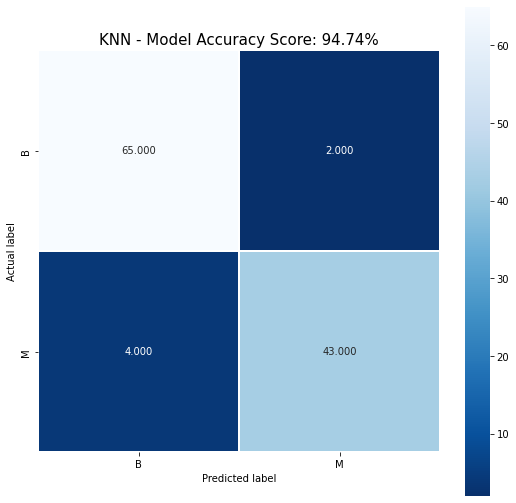

In [ ]:
# Define the range of hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5]
}

# Train a KNeighborsClassifier with GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results of the GridSearchCV
results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean test score: {:.2f}% for hyperparameters: {}".format(mean_test_score * 100, params))

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a KNeighborsClassifier using the best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'KNN - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Best hyperparameters", best_params)
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))


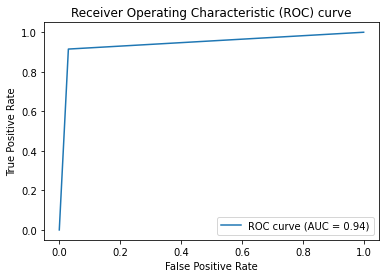

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()

## Random Forest classifier Implementation

Following parameters will be used to select optimal configuration for Random forest.

**n_estimators:** This parameter defines the number of trees in the forest. A larger number of trees can result in a more accurate model, but also increases the computational time.

**max_depth**: This parameter sets the maximum depth of each tree in the forest. A deeper tree can capture more complex relationships in the data, but also increases the risk of overfitting.

**min_samples_split**: This parameter sets the minimum number of samples required to split an internal node in a tree. A higher value for this parameter results in more conservative trees, which can help to reduce overfitting.



Mean test score: 95.60% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Mean test score: 94.73% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Mean test score: 94.95% for hyperparameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Mean test score: 94.51% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
Mean test score: 94.73% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200}
Mean test score: 94.95% for hyperparameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300}
Mean test score: 95.38% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 100}
Mean test score: 94.95% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 200}
Mean test score: 94.95% for hyperparameters: {'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 300}
Mean test score: 94.51% for hyperpara

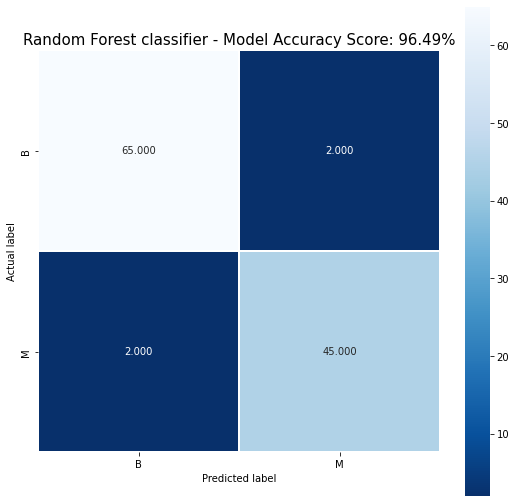

In [ ]:
# Define the hyperparameters to be tuned
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 4, 6]}

# Train a Random Forest classifier with GridSearchCV
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results of the GridSearchCV
results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean test score: {:.2f}% for hyperparameters: {}".format(mean_test_score * 100, params))


# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Predict the target values for the test data
rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Random Forest classifier - Model Accuracy Score: {accuracy:.2%}'
plt.title(all_sample_title, size = 15)

print(classification_report(y_test, y_pred,labels = [0, 1], target_names=class_names))

print("Best hyperparameters", best_params)
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score:{:.2%}".format(f1))

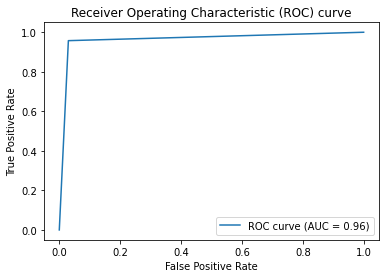

In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
plt.show()